In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import MeanAbsoluteError
import matplotlib.pyplot as plt
import random
from tensorflow.keras.optimizers import Adam

In [10]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### Pre-processing and selecting the metric

In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1]
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)  # Add channel dimension

### Train your initial model

In [12]:
def create_autoencoder(latent_dim=(4, 4, 32)):
    # Encoder
    encoder_input = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(latent_dim[2], (3, 3), activation='relu', padding='same')(x)
    encoder_output = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(latent_dim[2], (3, 3), activation='relu', padding='same')(encoder_output)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
    decoder_output = layers.Conv2DTranspose(1, (3, 3), strides=2, activation='sigmoid', padding='same')(x)

    # Ensure the output dimensions match the input dimensions
    decoder_output = layers.Cropping2D(((2, 2), (2, 2)))(decoder_output)
    
    autoencoder = models.Model(encoder_input, decoder_output)
    return autoencoder

# Compile the model with Mean Squared Error loss
autoencoder = create_autoencoder()
autoencoder.compile(optimizer='adam', loss=MeanAbsoluteError())

# Print model summary
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 8, 8, 64)       │        18,496 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 16, 16, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 32, 32, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_3 (Cropping2D)       │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,777 (327.25 KB)

 Trainable params: 83,777 (327.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.1067 - val_loss: 0.0520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0501 - val_loss: 0.0464
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0452 - val_loss: 0.0431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0426 - val_loss: 0.0414
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0410 - val_loss: 0.0403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0398 - val_loss: 0.0389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - loss: 0.0387 - val_loss: 0.0381
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - loss: 0.0378 - val_loss: 0.0374
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 0.0371 - val_loss: 0.0369
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0365 - val_loss: 0.0362


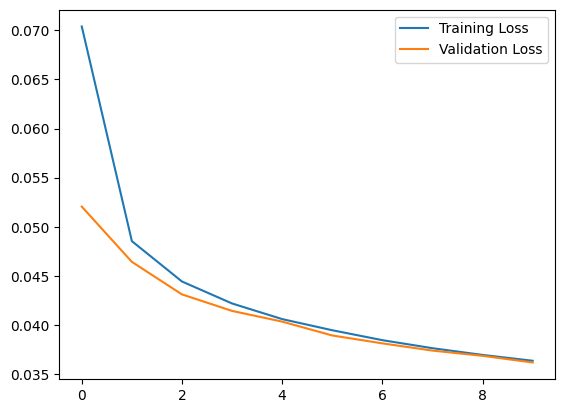

In [13]:
# Train the model
history = autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

### Optimize your model

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - loss: 0.0976 - val_loss: 0.0545
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - loss: 0.0524 - val_loss: 0.0484
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 0.0470 - val_loss: 0.0449
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.0441 - val_loss: 0.0424
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.0421 - val_loss: 0.0410
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.0405 - val_loss: 0.0399
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 0.0394 - val_loss: 0.0389
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.0385 - val_loss: 0.0382
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 0.0377 - val_loss: 0.0375
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - loss: 0.0371 - val_loss: 0.0369


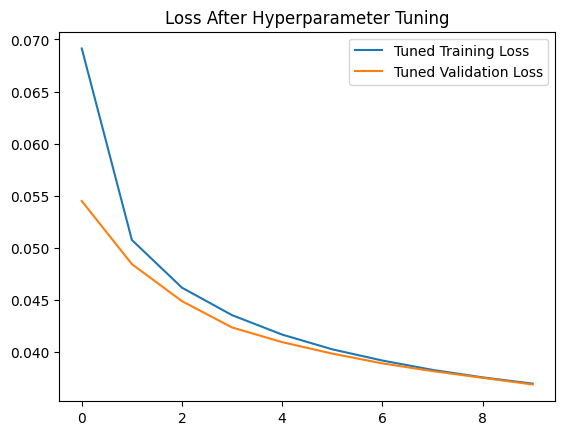

In [14]:
# Adjusted hyperparameters
learning_rate = 0.0005 # Default is 0.001
batch_size = 16 # Default is 32

# Recompile the model with the tuned learning rate
autoencoder = create_autoencoder()
autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanAbsoluteError())

# Retrain the model for another 10 epochs with the new batch size
history_tuned = autoencoder.fit(x_train, x_train, 
                                epochs=10, 
                                batch_size=batch_size, 
                                validation_data=(x_test, x_test))

# Plot the tuned model's training and validation loss
plt.plot(history_tuned.history['loss'], label='Tuned Training Loss')
plt.plot(history_tuned.history['val_loss'], label='Tuned Validation Loss')
plt.legend()
plt.title("Loss After Hyperparameter Tuning")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


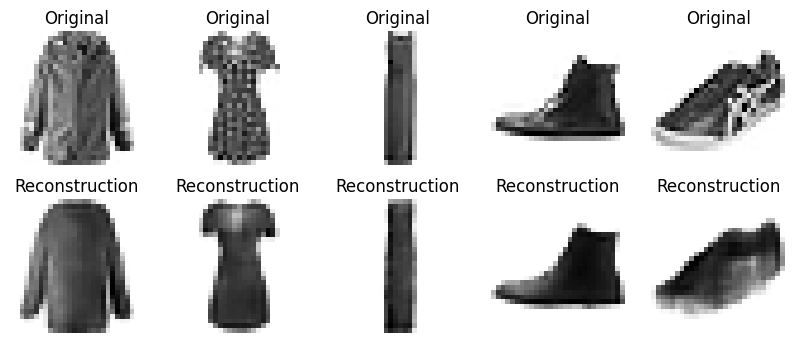

In [15]:
# Display some reconstructed images
def display_reconstructions(model, data, n=5):
    indices = random.sample(range(data.shape[0]), n)
    originals = data[indices]
    reconstructions = model.predict(originals)
    
    plt.figure(figsize=(10, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(originals[i].squeeze(), cmap="binary")
        plt.title("Original")
        plt.axis("off")
        
        # Reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructions[i].squeeze(), cmap="binary")
        plt.title("Reconstruction")
        plt.axis("off")
    plt.show()

# Test and display reconstructed samples
display_reconstructions(autoencoder, x_test)

### Decrease the latent space

In [16]:
# Hyperparameters for adjusting
learning_rate = 0.001 # Default is 0.001
batch_size = 128 # Default is 32

initial_latent_features = 32
latent_losses = []

# Decrease latent space by 4 each iteration and retrain model
for features in range(initial_latent_features, 4, -4):
    print(f"\nTraining with latent space feature dimension: {features}")
    autoencoder = create_autoencoder(latent_dim=(4, 4, features))
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanAbsoluteError())
    
    # Train and record validation performance
    history = autoencoder.fit(x_train, x_train, 
                              epochs=10, 
                              batch_size=batch_size, 
                              validation_data=(x_test, x_test), 
                              verbose=0)  # Set verbose to 0 to reduce output clutter
    
    # Append the last validation loss for this latent space size
    val_loss = history.history['val_loss'][-1]
    latent_losses.append((features, val_loss))

    # Display some reconstructions
    display_reconstructions(autoencoder, x_test, n=5)

# Plot the recorded validation losses
latent_dims, val_losses = zip(*latent_losses)
plt.plot(latent_dims, val_losses, marker='o')
plt.xlabel("Latent Space Feature Dimension")
plt.ylabel("Validation Loss (MSE)")
plt.title("Validation Loss vs. Latent Space Dimension")
plt.show()


Training with latent space feature dimension: 32


KeyboardInterrupt: 

### Final training

In [ ]:
optimal_latent_dim = min(latent_dims, key=lambda x: val_losses[latent_dims.index(x)] if val_losses[latent_dims.index(x)] < 0.1 else float('inf'))

# Rebuild and train the autoencoder with the optimal latent space dimension
print(f"\nTraining final model with optimal latent space dimension: {optimal_latent_dim}")

final_autoencoder = create_autoencoder(latent_dim=(4, 4, optimal_latent_dim))
final_autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanAbsoluteError())

# Train the model for 30 epochs on the full training set
history_final = final_autoencoder.fit(x_train, x_train, 
                                      epochs=30, 
                                      batch_size=batch_size, 
                                      validation_data=(x_test, x_test))

# Plot training and validation loss for the final model
plt.plot(history_final.history['loss'], label='Training Loss')
plt.plot(history_final.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Final Model Training and Validation Loss")
plt.show()

# Save the final model weights
final_autoencoder.save_weights("model/optimal_autoencoder.weights.h5")
print("Model weights saved as 'model/optimal_autoencoder.weights.h5'")

### Testing the autoencoder

In [ ]:
# Evaluate the final model on the test dataset to get the reconstruction error score
test_loss = final_autoencoder.evaluate(x_test, x_test, verbose=0)
print(f"Final Model Reconstruction Error (MSE) on Test Dataset: {test_loss:.4f}")

# Test the model on the test dataset and visualize reconstructions
display_reconstructions(final_autoencoder, x_test, n=5)